<a href="https://colab.research.google.com/github/RafsanJany-44/Thesis_Project/blob/main/Feature_Selection_O2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [11]:
import pandas as pd
import numpy as np
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
data = pd.read_csv("/content/O2.csv")
X = data.iloc[:,1:26] #independent columns
y = data[['Sleep Stage']]   #target column 

In [12]:
#apply SelectKBest class to extract top 10 best features
bestfeatures = SelectKBest(score_func=chi2, k=10)
fit = bestfeatures.fit(X,y)

In [13]:
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)

In [14]:
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns

In [15]:
featureScores

,Specs,Score
0,MeanP_Alpha_O2,98.720708
1,MedianF_Alpha_O2,1544.022268
2,MeanF_Alpha_O2,1261.157546
3,Spectral Edge_Alpha_O2,1770.417874
4,PeakF_Alpha_O2,2068.181451
5,MeanP_Beta_O2,46.791875
6,MedianF_Beta_O2,208.274699
7,MeanF_Beta_O2,203.797858
8,Spectral Edge_Beta_O2,296.850427
9,PeakF_Beta_O2,13412.650812


In [16]:
print(featureScores.nlargest(10,'Score'))  #print 10 best features

                     Specs         Score
9            PeakF_Beta_O2  13412.650812
24          PeakF_Gamma_O2   3299.314071
4           PeakF_Alpha_O2   2068.181451
3   Spectral Edge_Alpha_O2   1770.417874
1         MedianF_Alpha_O2   1544.022268
11        MedianF_Theta_O2   1444.685753
2           MeanF_Alpha_O2   1261.157546
17          MeanF_Delta_O2   1255.737116
14          PeakF_Theta_O2    996.307385
15          MeanP_Delta_O2    989.878436


#Another Algorithm to Compare the result (ExtraTreesClassifier)

In [17]:
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model = ExtraTreesClassifier()
model.fit(X,y)
print(featureScores.nlargest(10,'Score'))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


                     Specs         Score
9            PeakF_Beta_O2  13412.650812
24          PeakF_Gamma_O2   3299.314071
4           PeakF_Alpha_O2   2068.181451
3   Spectral Edge_Alpha_O2   1770.417874
1         MedianF_Alpha_O2   1544.022268
11        MedianF_Theta_O2   1444.685753
2           MeanF_Alpha_O2   1261.157546
17          MeanF_Delta_O2   1255.737116
14          PeakF_Theta_O2    996.307385
15          MeanP_Delta_O2    989.878436


In [18]:
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers

[0.03779091 0.04098703 0.0456715  0.04517555 0.03073972 0.03704627
 0.04015064 0.03705797 0.03763874 0.02817878 0.04003357 0.0715808
 0.03934584 0.0574078  0.04530226 0.03959392 0.03298986 0.07348783
 0.04748524 0.02655456 0.03665954 0.03320885 0.0293917  0.02782207
 0.01869906]


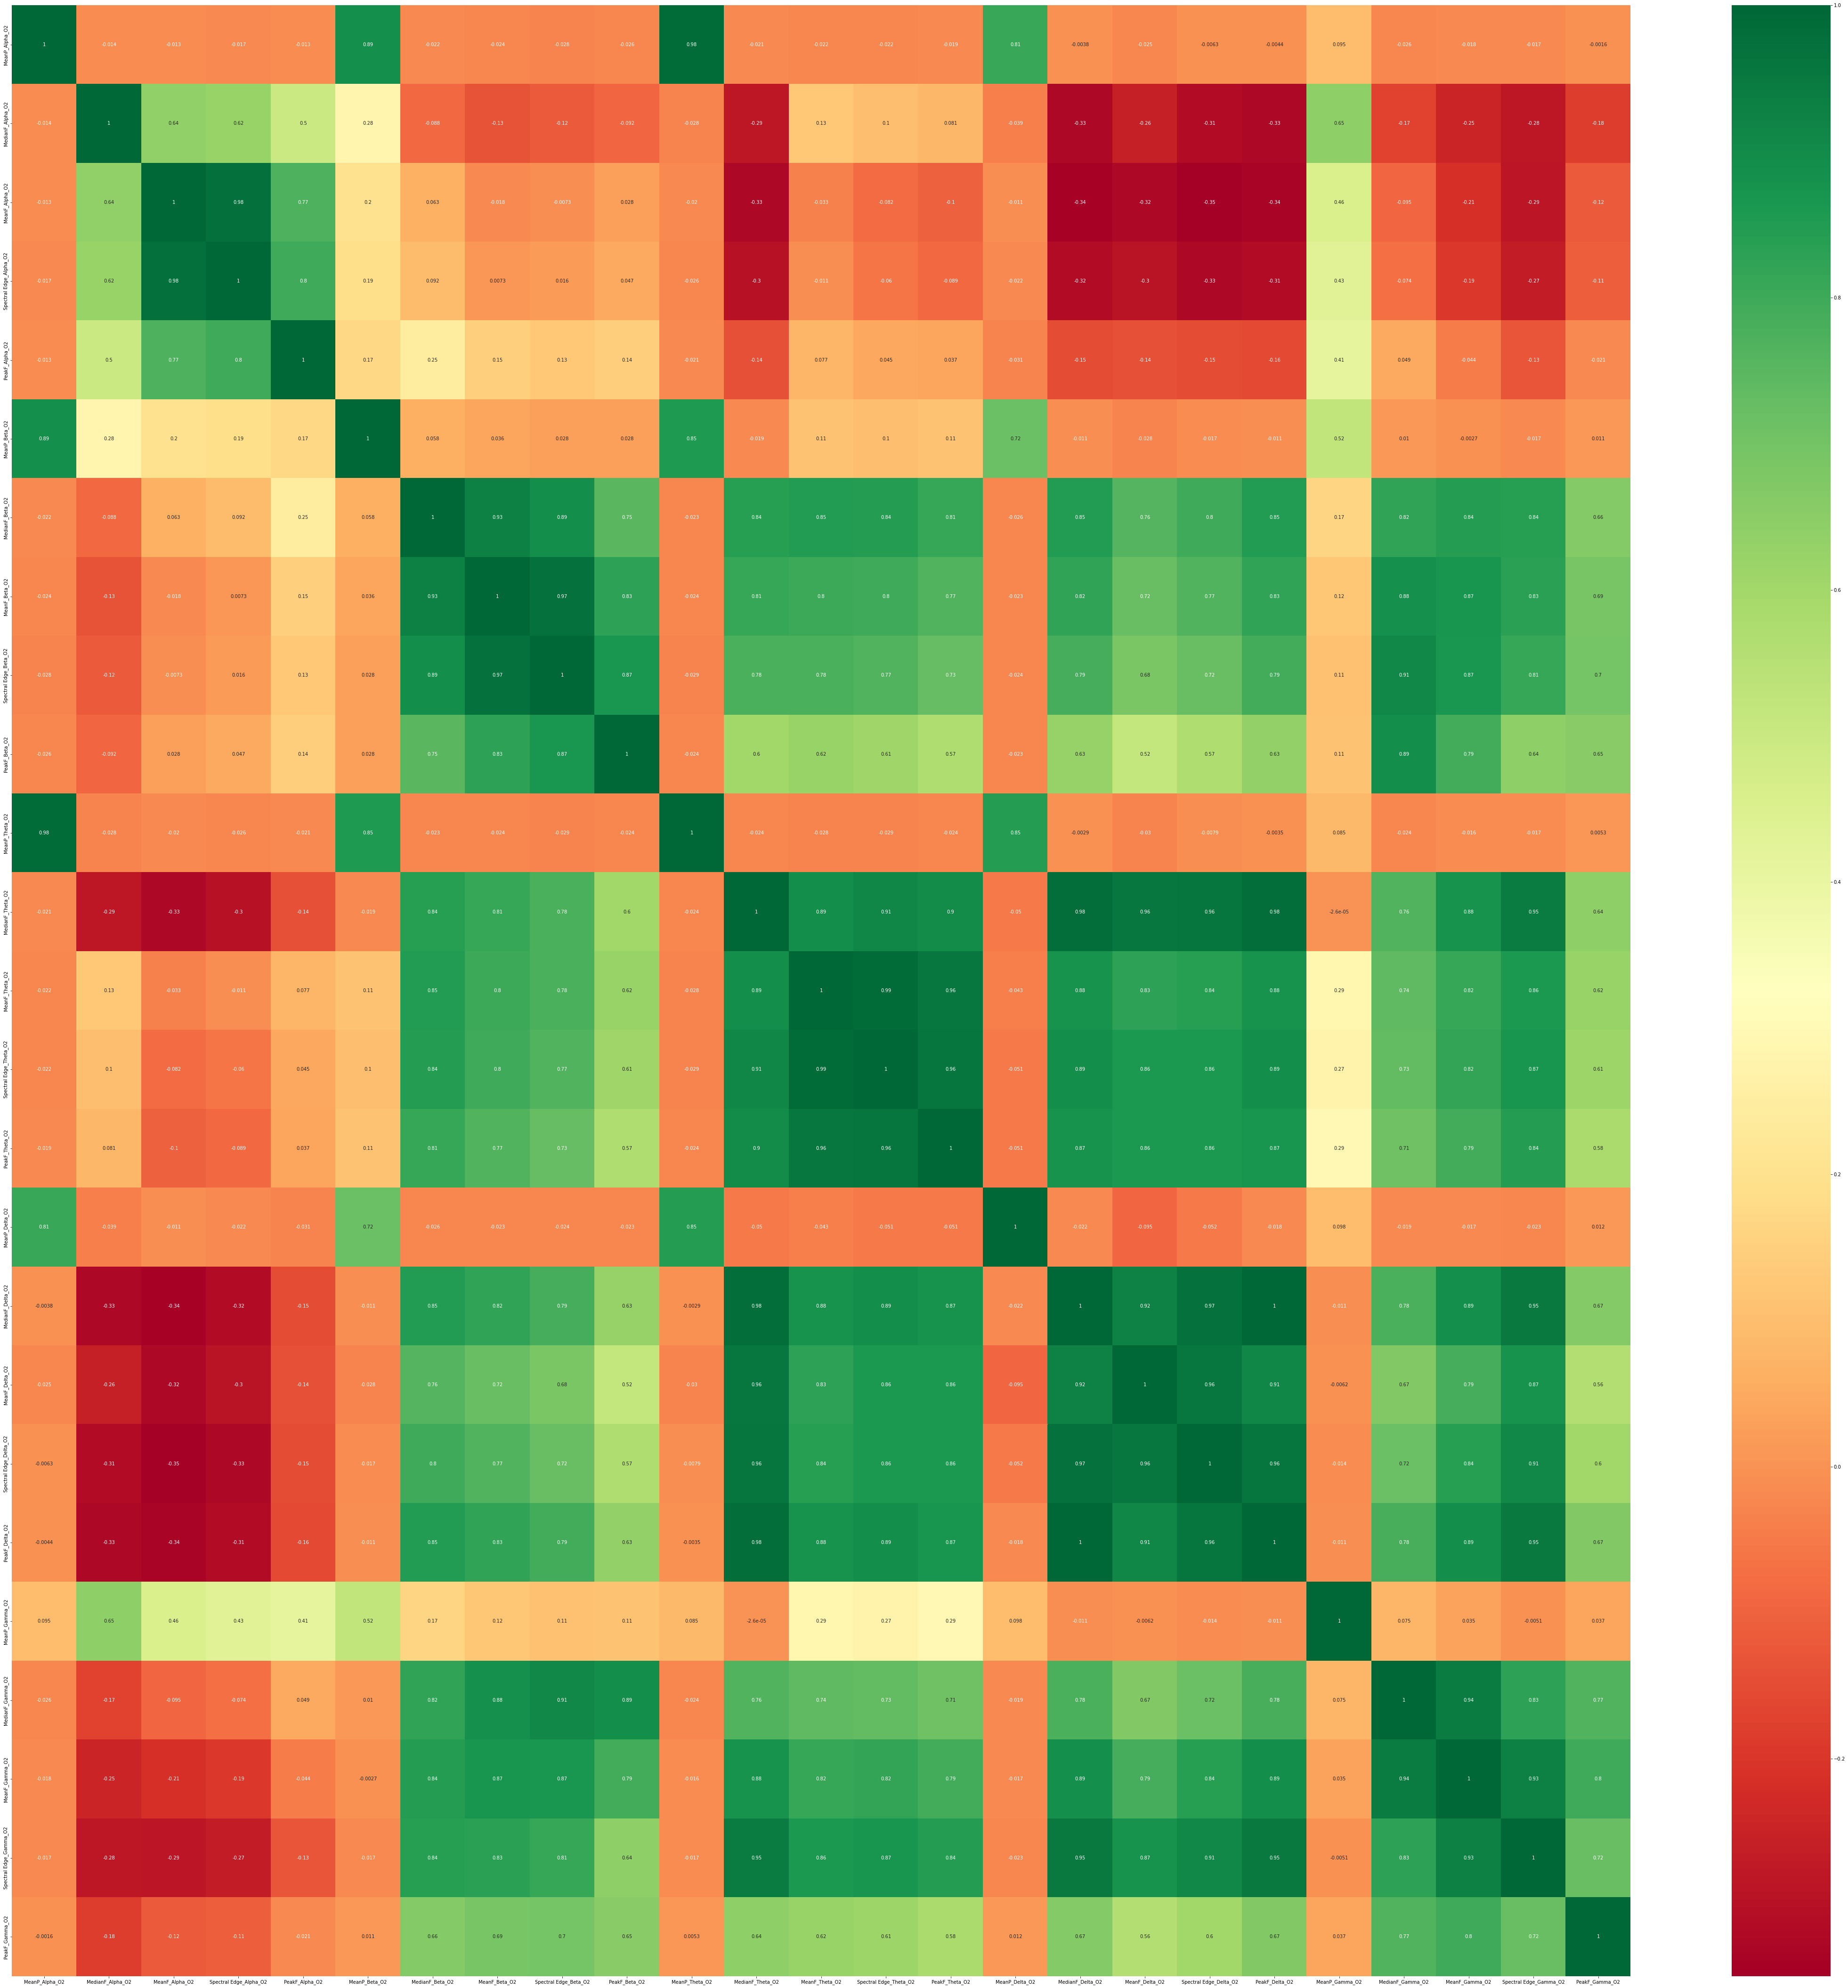

In [19]:
import seaborn as sns
#get correlations of each features in dataset
corrmat = data.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(77,77))
#plot heat map
g=sns.heatmap(data[top_corr_features].corr(),annot=True,cmap="RdYlGn")